In [ ]:
!pip install matplotlib==3.1.3
!pip install --pre pycaret
!pip install shap
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Bibliotecas**

In [ ]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import folium
from folium import plugins
import json
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from sklearn.model_selection import train_test_split

## **Base de Dados**

In [ ]:
#Fonte de Base de Dados
font = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true" 
dados_enem2019 = pd.read_csv(font)
dados_enem2019.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


Para realizar as predições, estarei utilizando modelos de Regressão, pelo fato de: irei utilizar as notas nas outras áreas, que assumem um valor numérico para prever um valor numérico

In [ ]:
from pycaret.regression import *
import pycaret
from pycaret.utils import enable_colab


Estarei eliminando os Valores Faltantes, para melhorar o modelo.

In [ ]:
dados_machine_learning = dados_enem2019[['NU_NOTA_MT', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_CN']]
dados_machine_learning = dados_machine_learning.dropna()
correlacao = dados_machine_learning.corr()
correlacao

,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN
NU_NOTA_MT,1.000000,0.610570,0.587986,0.650386
NU_NOTA_CH,0.610570,1.000000,0.748561,0.669259
NU_NOTA_LC,0.587986,0.748561,1.000000,0.641998
NU_NOTA_CN,0.650386,0.669259,0.641998,1.000000


**Analisando a correlação**

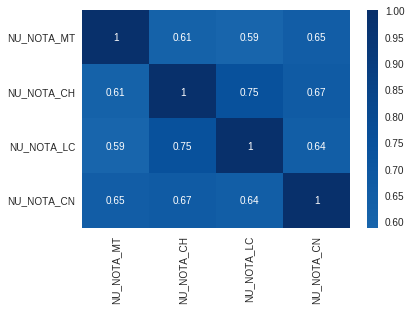

In [ ]:
sns.heatmap(correlacao, cmap="Blues", center=0, annot=True);


Notamos que Linguagens e Códigos  é a matéria que tem mais influencia a nota de Ciências Humanas.

**Visualizando os dados**

In [ ]:
dados_machine_learning.head()

,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN
0,432.4,512.3,488.6,435.6
2,427.2,499.1,441.0,423.2
3,499.9,578.1,551.5,426.2
4,424.5,571.3,511.2,516.5
5,615.6,618.7,607.5,559.6


# **Utilizando o PyCaret**

In [ ]:
train, validation = train_test_split(dados_machine_learning, test_size=0.2,
                                     random_state=1234)

reg = setup(data = train, 
              target = 'NU_NOTA_CH', train_size = 0.7, session_id = 1234)

,Description,Value
0,Session id,1234
1,Target,NU_NOTA_CH
2,Target type,Regression
3,Data shape,"(74031, 4)"
4,Train data shape,"(51821, 4)"
5,Test data shape,"(22210, 4)"
6,Numeric features,3
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [ ]:
# Treinar modelos

compare_models(fold = 10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,37.1581,2352.7917,48.4987,0.6449,0.1809,0.0773,3.6320
lightgbm,Light Gradient Boosting Machine,37.2375,2370.5653,48.6772,0.6423,0.1854,0.0774,0.2860
lasso,Lasso Regression,37.6689,2428.1557,49.2701,0.6335,0.1938,0.0785,0.0920
ridge,Ridge Regression,37.6684,2428.1554,49.2701,0.6335,0.1938,0.0785,0.0840
en,Elastic Net,37.6689,2428.1556,49.2701,0.6335,0.1938,0.0785,0.0990
lar,Least Angle Regression,37.6684,2428.1554,49.2701,0.6335,0.1938,0.0785,0.1180
br,Bayesian Ridge,37.6685,2428.1554,49.2701,0.6335,0.1938,0.0785,0.0780
lr,Linear Regression,37.6684,2428.1555,49.2701,0.6335,0.1938,0.0785,0.8870
huber,Huber Regressor,37.5263,2440.7046,49.3968,0.6317,0.1938,0.0788,0.6650
rf,Random Forest Regressor,39.0082,2581.5150,50.8019,0.6104,0.1790,0.0810,15.9420


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

GradientBoostingRegressor(random_state=1234)

In [ ]:
lightgbm = create_model('lightgbm')
# criando modelo

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,37.4111,2398.4471,48.9739,0.6388,0.1799,0.0777
1,37.2810,2443.8779,49.4356,0.6244,0.2004,0.0777
2,37.4780,2413.1699,49.1240,0.6413,0.2170,0.0776
3,37.1581,2305.0273,48.0107,0.6524,0.1484,0.0778
4,37.6679,2582.0386,50.8138,0.6224,0.2811,0.0774
5,37.6177,2409.5450,49.0871,0.6451,0.1782,0.0787
6,37.0813,2336.5750,48.3381,0.6410,0.1796,0.0768
7,36.5220,2178.6518,46.6760,0.6579,0.1300,0.0760
8,36.9128,2281.9596,47.7699,0.6603,0.1526,0.0773


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
dicionario_metricas = {
    'MAE': {'Média': 36.8409, 'Desvio Padrão': 0.6424},
    'MSE': {'Média': 2294.2634, 'Desvio Padrão': 86.8002},
    'RMSE':  {'Média': 47.8899,  'Desvio Padrão':  0.9054},
    'R2': {'Média': 0.6484,  'Desvio Padrão': 0.0223},
    'RMSLE': {'Média': 0.1707, 'Desvio Padrão': 0.0497},
    'MAPE': {'Média': 0.0765, 'Desvio Padrão': 0.0016}
}

In [ ]:
for x in dicionario_metricas:
  media = dicionario_metricas[x]['Média']
  sd = dicionario_metricas[x]['Desvio Padrão']
  print('O intervalo de confiança (de 95%) para {} é de {} até {}'.format(x, round(media - 1.96*sd, 5), round(media + 1.96*sd, 5)))

O intervalo de confiança (de 95%) para MAE é de 35.5818 até 38.1
O intervalo de confiança (de 95%) para MSE é de 2124.13501 até 2464.39179
O intervalo de confiança (de 95%) para RMSE é de 46.11532 até 49.66448
O intervalo de confiança (de 95%) para R2 é de 0.60469 até 0.69211
O intervalo de confiança (de 95%) para RMSLE é de 0.07329 até 0.26811
O intervalo de confiança (de 95%) para MAPE é de 0.07336 até 0.07964


In [ ]:
predict_model(lightgbm)
#modelo preditivo

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,37.5277,2387.1874,48.8589,0.6446,0.1886,0.0784


,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_CH,Label
51821,716.900024,595.099976,585.500000,604.099976,609.668213
51822,391.200012,472.799988,457.100006,376.500000,447.701922
51823,557.400024,426.100006,424.700012,372.299988,435.461809
51824,438.600006,409.299988,371.200012,457.500000,416.698259
51825,421.000000,544.000000,485.299988,566.900024,512.981782
...,...,...,...,...,...
74026,521.299988,537.099976,508.600006,587.200012,521.397456
74027,445.000000,448.700012,379.500000,444.399994,431.351678
74028,457.799988,474.799988,515.099976,442.200012,465.753072
74029,753.299988,639.299988,650.200012,657.500000,667.694638


As métricas estão dentro do intervalo de confiança.

**Plotando** **gráficos**


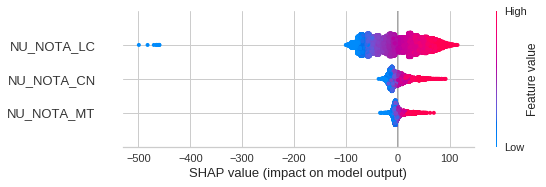

In [ ]:
interpret_model(lightgbm)

Importancia de cada variável:

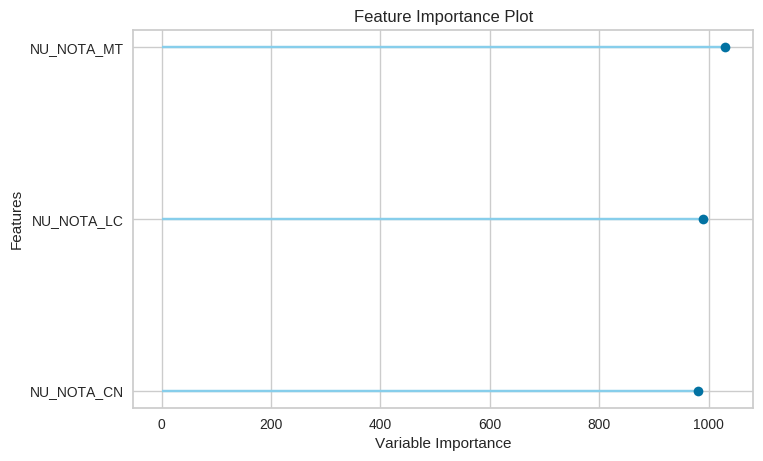

In [ ]:
plot_model(lightgbm, 'feature')

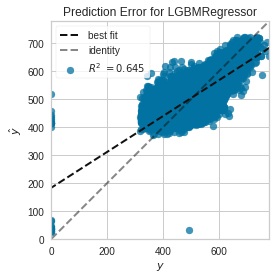

In [ ]:
plot_model(lightgbm, plot='error')

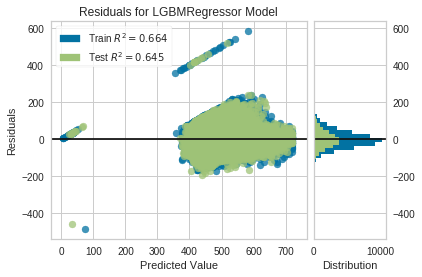

In [ ]:
plot_model(lightgbm, plot='residuals')

**Parâmetros Utilizados**

In [ ]:
plot_model(lightgbm, plot='parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


In [ ]:
modelo_finalizado = finalize_model(lightgbm)
save_model(modelo_finalizado, 'ciencias_humanas_ml')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CN'], transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[], transformer=SimpleImputer(fill_value='constant', strategy='constant'))),
                 ['trained_model', LGBMRegressor(random_state=1234)]]),
 'ciencias_humanas_ml.pkl')

In [ ]:
loaded_model = load_model('ciencias_humanas_ml')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
previsoes = predict_model(loaded_model, data=validation)
previsoes

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,37.0577,2303.9014,47.9990,0.6482,0.1770,0.0768


,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_CH,Label
18352,479.000000,493.200012,407.899994,485.799988,452.326158
43950,375.600006,506.500000,370.100006,514.099976,452.149053
3805,634.099976,565.099976,521.400024,584.500000,554.926327
86575,538.299988,464.600006,496.200012,461.200012,464.145444
120366,469.299988,527.400024,500.000000,483.799988,505.624936
...,...,...,...,...,...
11081,469.500000,488.200012,353.000000,481.100006,447.968612
31487,460.799988,502.200012,472.799988,545.299988,474.361716
64752,509.399994,493.799988,495.899994,556.400024,483.032394
55090,471.200012,436.200012,471.700012,540.700012,436.376719
